In [12]:
import sklearn
import numpy as np
import pandas as pd
import xgboost as xgb
import tensorflow as tf


In [13]:
# loading MNIST dataset
from keras.datasets import mnist
(X_train, y_train), (X_validation, y_validation) = mnist.load_data()

In [14]:
print(x_train.shape)
print(x_validation.shape)

(60000, 28, 28)
(10000, 28, 28)


In [15]:
print(np.min(x_train))
print(np.max(x_train))

0
255


<Figure size 432x288 with 0 Axes>

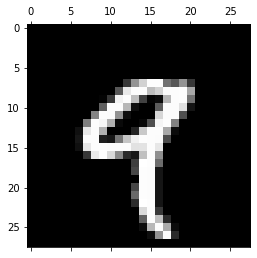

In [16]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(x_train[4])
plt.show()

# Gradient Boost Tree with Xgboost

In [31]:
X_train_flat = X_train.reshape(x_train.shape[0], 28*28)
X_validation_flat = X_validation.reshape(x_validation.shape[0], 28*28)

In [33]:
from xgboost import XGBClassifier

my_model = XGBClassifier(
    base_score=0.5,
    objective='multi:softmax',
    num_class=10,
    
    gamma=3,
    max_depth=7,
    learning_rate=0.3, 
    min_child_weight=10,
    n_estimators=1000,
    subsample=0.8,
    colsample_bynode=1,
    colsample_bytree=0.8,
    reg_alpha=0,
    reg_lambda=1,

    random_state=0,
    booster='gbtree',
    tree_method='hist',
    seed=1234,
    missing=-1,
    verbosity=1
)

print(my_model.get_xgb_params())

trained = my_model.fit(
    X_train_flat, y_train, early_stopping_rounds=5,
    # the last metric is used for early stopping
    eval_metric=["merror", "mlogloss"],
    eval_set=[(X_train_flat, y_train), (X_validation_flat, y_validation)], verbose=True)


{'objective': 'multi:softmax', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': None, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 3, 'gpu_id': None, 'interaction_constraints': None, 'learning_rate': 0.3, 'max_delta_step': None, 'max_depth': 7, 'min_child_weight': 10, 'monotone_constraints': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': None, 'subsample': 0.8, 'tree_method': 'hist', 'validate_parameters': None, 'verbosity': 1, 'num_class': 10, 'seed': 1234}
[0]	validation_0-merror:0.12722	validation_0-mlogloss:1.33810	validation_1-merror:0.13960	validation_1-mlogloss:1.34733
[1]	validation_0-merror:0.08793	validation_0-mlogloss:1.00636	validation_1-merror:0.10260	validation_1-mlogloss:1.02372
[2]	validation_0-merror:0.07303	validation_0-mlogloss:0.79136	validation_1-merror:0.08710	validation_1-mlogloss:0.81512
[3]	validation_0-merror:0.06462	validation_0-mlogloss:0.63873	validation_1-merr

[64]	validation_0-merror:0.00603	validation_0-mlogloss:0.03908	validation_1-merror:0.02780	validation_1-mlogloss:0.09602
[65]	validation_0-merror:0.00607	validation_0-mlogloss:0.03867	validation_1-merror:0.02790	validation_1-mlogloss:0.09574
[66]	validation_0-merror:0.00595	validation_0-mlogloss:0.03843	validation_1-merror:0.02800	validation_1-mlogloss:0.09553
[67]	validation_0-merror:0.00593	validation_0-mlogloss:0.03828	validation_1-merror:0.02790	validation_1-mlogloss:0.09539
[68]	validation_0-merror:0.00588	validation_0-mlogloss:0.03803	validation_1-merror:0.02790	validation_1-mlogloss:0.09516
[69]	validation_0-merror:0.00582	validation_0-mlogloss:0.03792	validation_1-merror:0.02790	validation_1-mlogloss:0.09509
[70]	validation_0-merror:0.00573	validation_0-mlogloss:0.03762	validation_1-merror:0.02790	validation_1-mlogloss:0.09475
[71]	validation_0-merror:0.00577	validation_0-mlogloss:0.03742	validation_1-merror:0.02770	validation_1-mlogloss:0.09460
[72]	validation_0-merror:0.00570

[132]	validation_0-merror:0.00443	validation_0-mlogloss:0.03268	validation_1-merror:0.02640	validation_1-mlogloss:0.09047
[133]	validation_0-merror:0.00445	validation_0-mlogloss:0.03261	validation_1-merror:0.02670	validation_1-mlogloss:0.09041
[134]	validation_0-merror:0.00445	validation_0-mlogloss:0.03251	validation_1-merror:0.02650	validation_1-mlogloss:0.09020
[135]	validation_0-merror:0.00445	validation_0-mlogloss:0.03247	validation_1-merror:0.02660	validation_1-mlogloss:0.09011
[136]	validation_0-merror:0.00445	validation_0-mlogloss:0.03240	validation_1-merror:0.02660	validation_1-mlogloss:0.09004
[137]	validation_0-merror:0.00445	validation_0-mlogloss:0.03234	validation_1-merror:0.02660	validation_1-mlogloss:0.08998
[138]	validation_0-merror:0.00447	validation_0-mlogloss:0.03228	validation_1-merror:0.02660	validation_1-mlogloss:0.08989
[139]	validation_0-merror:0.00447	validation_0-mlogloss:0.03228	validation_1-merror:0.02660	validation_1-mlogloss:0.08988
[140]	validation_0-merro

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
CATEGORIES = list(range(0, 10))

In [36]:
y_hat = trained.predict(X_validation_flat)
print(classification_report(y_true=y_validation, y_pred=y_hat, digits=4))

              precision    recall  f1-score   support

           0     0.9748    0.9857    0.9802       980
           1     0.9877    0.9912    0.9894      1135
           2     0.9708    0.9661    0.9684      1032
           3     0.9647    0.9743    0.9695      1010
           4     0.9815    0.9715    0.9765       982
           5     0.9807    0.9697    0.9752       892
           6     0.9731    0.9812    0.9771       958
           7     0.9763    0.9611    0.9686      1028
           8     0.9614    0.9713    0.9663       974
           9     0.9633    0.9613    0.9623      1009

    accuracy                         0.9735     10000
   macro avg     0.9734    0.9733    0.9734     10000
weighted avg     0.9735    0.9735    0.9735     10000



In [37]:
cm = confusion_matrix(y_true=y_validation, y_pred=y_hat, labels=CATEGORIES)
cm

array([[ 966,    1,    0,    1,    0,    2,    6,    1,    2,    1],
       [   0, 1125,    1,    2,    0,    1,    3,    0,    3,    0],
       [   5,    0,  997,    6,    2,    1,    2,    8,    9,    2],
       [   1,    0,    4,  984,    0,    4,    1,    7,    6,    3],
       [   0,    0,    6,    1,  954,    0,    2,    0,    3,   16],
       [   2,    1,    0,    8,    0,  865,    6,    3,    7,    0],
       [   6,    2,    0,    0,    2,    4,  940,    0,    4,    0],
       [   2,    5,   14,    6,    3,    0,    0,  988,    0,   10],
       [   4,    0,    3,    6,    1,    3,    5,    1,  946,    5],
       [   5,    5,    2,    6,   10,    2,    1,    4,    4,  970]])

# Simple CNN

In [43]:
import tensorflow as tf

from tensorflow import keras as keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, History, ReduceLROnPlateau, TensorBoard, EarlyStopping
from tensorflow.keras.layers import Activation, BatchNormalization, Input, Reshape, Dense, Conv2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.metrics import CategoricalAccuracy, SparseCategoricalCrossentropy, SparseCategoricalAccuracy


In [75]:
def build_cnn():
    inputs = Input(shape=(28, 28, 1,))
    l = inputs
    
    l = Conv2D(
        filters=32,kernel_size=[3,3],
        padding='same',activation='relu', name='conv1')(l)
#     l = BatchNormalization()(l)
    l = Dropout(0.2)(l)

    
    l = Conv2D(
        filters=16,kernel_size=[3,3],
        padding='same',activation='relu', name='conv2')(l)
#     l = BatchNormalization()(l)

        
    l = Conv2D(
        filters=4,kernel_size=[3,3],
        padding='same',activation='relu', name='conv3')(l)
#     l = BatchNormalization()(l)
    
    l = Reshape((4*28*28,), name='flatten')(l)
    l = Dense(10, activation="softmax", name='main_output')(l)


    m_cnn = Model(inputs=inputs, outputs=l)
    print(m_cnn.summary())
    return m_cnn

def model_train(X_train, y_train, X_val, y_val, model):
    print(model.summary())
    early_stop = EarlyStopping(
        monitor="val_loss", min_delta=1e-5, patience=3,
        verbose=0, mode="auto", baseline=None, restore_best_weights=True
    )
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=1, min_lr=1e-5)

    callbacks_list = [early_stop, reduce_lr]

    # optimizer: gradient descent implementation
    adam_wn = Adam(learning_rate=2e-3)
    
    # compile model with loss and optimizer; loss function needs to match the intention and the output of the last layer
    model.compile(
        loss="sparse_categorical_crossentropy", optimizer=adam_wn,
        metrics=[SparseCategoricalAccuracy()]
    )
    
    # kick off model training
    return model.fit(
        x=X_train, y=y_train, validation_data=(X_val, y_val), batch_size=128,
        epochs=100, verbose=1, shuffle=True,
        callbacks=callbacks_list)


In [45]:
X_train_scaled = X_train.astype("float32") / 255
X_validation_scaled = X_validation.astype("float32") / 255

In [78]:
idx = -1

In [79]:

my_tf_model = build_cnn()

model_train(X_train_scaled[0:idx], y_train[0:idx], X_validation_scaled, y_validation, my_tf_model)

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 28, 28, 16)        4624      
_________________________________________________________________
conv3 (Conv2D)               (None, 28, 28, 4)         580       
_________________________________________________________________
flatten (Reshape)            (None, 3136)              0         
_________________________________________________________________
main_output (Dense)          (None, 10)                313

In [59]:
import numpy as np
y_hat = np.argmax(my_tf_model.predict(X_validation_scaled), axis=1)
print(classification_report(y_true=y_validation, y_pred=y_hat, digits=4))

              precision    recall  f1-score   support

           0     0.9652    0.9918    0.9784       980
           1     0.9920    0.9850    0.9885      1135
           2     0.9660    0.9622    0.9641      1032
           3     0.9858    0.9653    0.9755      1010
           4     0.9906    0.9674    0.9789       982
           5     0.9896    0.9563    0.9726       892
           6     0.9883    0.9697    0.9789       958
           7     0.9615    0.9728    0.9671      1028
           8     0.9181    0.9784    0.9473       974
           9     0.9653    0.9663    0.9658      1009

    accuracy                         0.9718     10000
   macro avg     0.9723    0.9715    0.9717     10000
weighted avg     0.9723    0.9718    0.9719     10000



In [60]:
cm = confusion_matrix(y_true=y_validation, y_pred=y_hat, labels=CATEGORIES)
cm

array([[ 972,    0,    0,    0,    1,    0,    0,    2,    5,    0],
       [   1, 1118,    6,    1,    0,    0,    0,    3,    6,    0],
       [   5,    0,  993,    2,    2,    0,    2,   10,   18,    0],
       [   0,    0,    8,  975,    0,    3,    0,    9,   14,    1],
       [   2,    0,    4,    0,  950,    0,    1,    2,    3,   20],
       [   3,    0,    0,    6,    0,  853,    7,    1,   19,    3],
       [  13,    2,    2,    1,    2,    2,  929,    0,    7,    0],
       [   2,    2,    9,    2,    1,    0,    0, 1000,    4,    8],
       [   5,    0,    6,    1,    1,    0,    1,    4,  953,    3],
       [   4,    5,    0,    1,    2,    4,    0,    9,    9,  975]])